<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_boosting_models_guided_example_Module_15_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [ ]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Define outcome and predictors.
# Set the outcomes to `0` and `1`.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable `country` into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [ ]:
# You'll make 500 iterations, use 2-deep trees, and set your loss function.

# It's best to update this table for the drill 
# at the end of the checkpoint.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


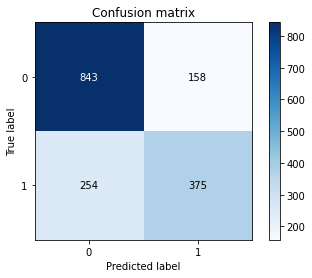

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


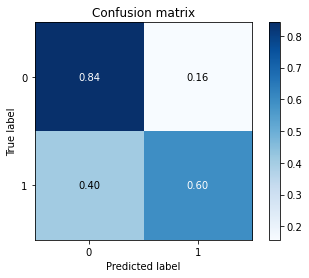

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
clf.score(X_test, y_test)

0.747239263803681

In [ ]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

In [ ]:
recall_score(y_test,y_pred)

0.5961844197138315

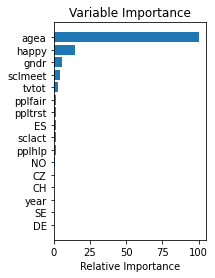

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Try to improve the model, using the same metrics to evaluate results (precision, accuracy, recall).

A few possible parameters to tune:

learning_rate max_depth n_estimators loss subsample min_samples_split

In [ ]:
#try increasing depth
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
#accuracy
clf.score(X_test, y_test)

0.7460122699386503

In [ ]:
#precision
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.6972477064220184

In [ ]:
#recall
recall_score(y_test,y_pred)

0.604133545310016

Well that didn't improve things. Maybe try a different loss

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
#accuracy
clf.score(X_test, y_test)

0.7404907975460123

In [ ]:
#precision
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.6886446886446886

In [ ]:
#recall
recall_score(y_test,y_pred)

0.5977742448330684

That actually lowered the precision late. Trying adjusting learning rate

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'learning_rate': 0.01,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
#accuracy
clf.score(X_test, y_test)

0.7404907975460123

In [ ]:
#precision
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7783783783783784

In [ ]:
#recall
recall_score(y_test,y_pred)

0.4578696343402226

That improved the precision but lowered the recall (makes sense since there is a tradeoff). Try a different learning rate

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'learning_rate': 0.05,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
#accuracy
clf.score(X_test, y_test)

0.747239263803681

In [ ]:
#precision
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7246376811594203

In [ ]:
#recall
recall_score(y_test,y_pred)

0.5564387917329093

That learning rate didn't do as well. Stick with .01 and maybe increase the iterations.

In [ ]:
params = {'n_estimators': 1000,
          'max_depth': 2,
          'learning_rate': 0.01,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
#accuracy
clf.score(X_test, y_test)

0.7404907975460123

In [ ]:
#precision
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.76010101010101

In [ ]:
#recall
recall_score(y_test,y_pred)

0.4785373608903021

Adjusting the learning rate seemed to improve the precision the most, but at a cost to the recall rate. Changing the loss to expontential worsened the model. Increasing the iterations also did not help, neither did changing the max depth. I'm sure something else could help. Perhaps including additional explanatory variables or using different overfitting techniques like subsampling.